In [ ]:
!pip install nlp

In [3]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

In [4]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


In [5]:
from datasets import load_dataset

In [ ]:
!pip install datasets

In [ ]:
emotion_dataset = load_dataset("emotion")

In [8]:
emotion_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [9]:
train = emotion_dataset['train']
val = emotion_dataset['validation']
test = emotion_dataset['test']

In [10]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets,labels

In [11]:
tweets,labels = get_tweet(train)

In [46]:
for i in range(5):
  print(tweets[i], labels[i])
# Description of Labels
# sadness: 0
# joy: 1
# love: 2
# anger: 3
# fear: 4
# surprise: 5

i didnt feel humiliated 0
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake 0
im grabbing a minute to post i feel greedy wrong 3
i am ever feeling nostalgic about the fireplace i will know that it is still on the property 2
i am feeling grouchy 3


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [14]:
tokenizer = Tokenizer(num_words=10000,oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [15]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [16]:
import matplotlib.pyplot as plt


Padding and Truncating as we need all of our inputs to be of the same shape

<function matplotlib.pyplot.show(close=None, block=None)>

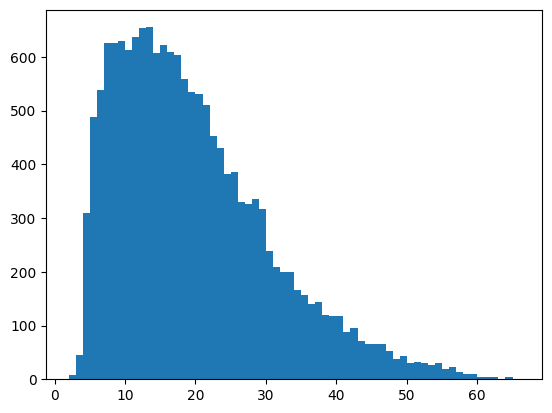

In [17]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths,bins = len(set(lengths)))
plt.show

In [18]:
max_len = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
def get_sequences(tokenizer,tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences,truncating='post',padding='post',maxlen=max_len)
  return padded

In [20]:
padded_train_seq = get_sequences(tokenizer,tweets)

In [21]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [22]:
classes = set(labels)

In [23]:
print(classes)

{0, 1, 2, 3, 4, 5}


(array([4666.,    0., 5362.,    0., 1304.,    0., 2159.,    0., 1937.,
         572.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

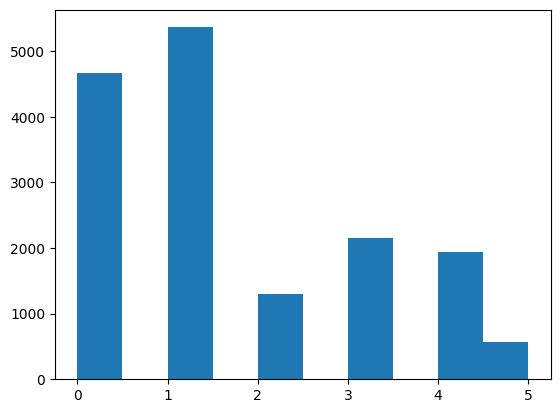

In [24]:
plt.hist(labels)

In [25]:
class_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_class = dict((v,k) for k,v in class_to_index.items())

In [26]:
class_to_index

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [27]:
labels[0]

0

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length = max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6,activation = 'softmax')
])
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
val_tweets,val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer,val_tweets)

In [31]:
padded_train_seq = np.array(padded_train_seq)
labels = np.array(labels)
val_seq = np.array(val_seq)
val_labels = np.array(val_labels)
h = model.fit(
    padded_train_seq,labels,validation_data = (val_seq,val_labels),epochs=20,callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)]
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 33s 55ms/step - accuracy: 0.3560 - loss: 1.5623 - val_accuracy: 0.6765 - val_loss: 0.9251
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.7646 - loss: 0.6657 - val_accuracy: 0.7920 - val_loss: 0.5884
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.8481 - loss: 0.4080 - val_accuracy: 0.8510 - val_loss: 0.4907
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9233 - loss: 0.2331 - val_accuracy: 0.8860 - val_loss: 0.3615
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.9569 - loss: 0.1400 - val_accuracy: 0.8865 - val_loss: 0.3584
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.9680 - loss: 0.1050 - val_accuracy: 0.8900 - val_loss: 0.3681
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9720 - loss: 0.0951 - val_accuracy: 0.8840 - val_loss: 0.3777
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9779 - loss: 0.0735 - 

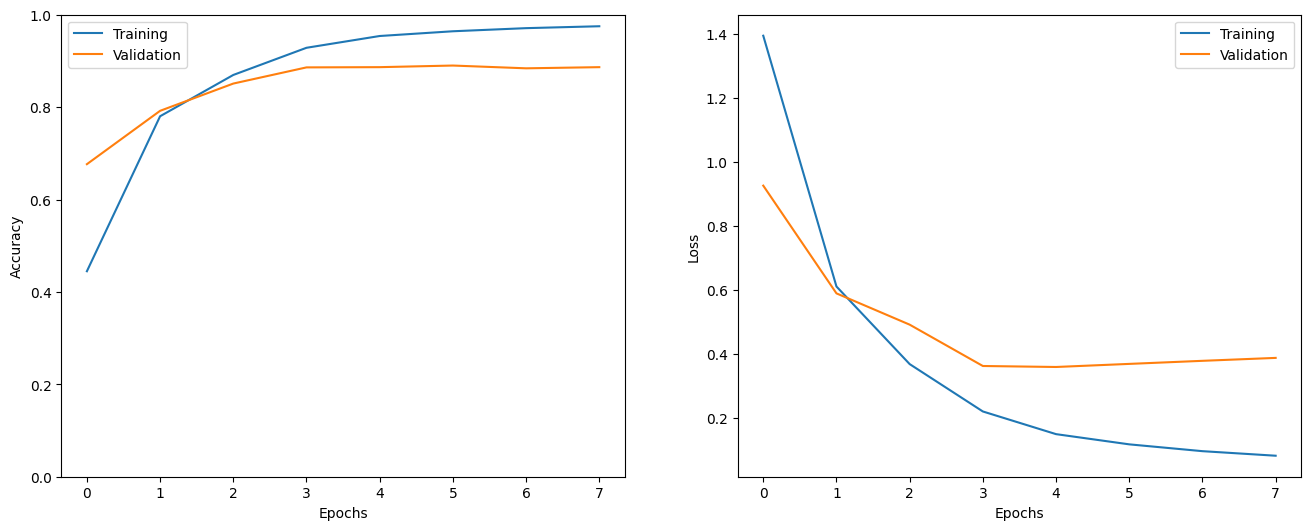

In [32]:
show_history(h)

In [33]:
test_tweets,test_labels= get_tweet(test)
test_seq = get_sequences(tokenizer,test_tweets)


In [34]:
test_tweets =np.array(test_tweets)
test_labels = np.array(test_labels)

In [35]:
_=model.evaluate(test_seq,test_labels)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8857 - loss: 0.4136


In [36]:
preds = (model.predict(test_seq) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


In [37]:
preds

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]], dtype=int32)

In [43]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Convert predictions back to single-column multiclass format
preds_single_column = np.argmax(preds, axis=1)
print(preds_single_column[0],test_labels[0])
print(np.unique(preds_single_column))
print(np.unique(test_labels))

0 0
[0 1 2 3 4 5]
[0 1 2 3 4 5]


In [44]:
print('Accuracy', accuracy_score(test_labels, preds_single_column))
print('Recall', recall_score(test_labels, preds_single_column, average='weighted'))
print('Precision', precision_score(test_labels, preds_single_column, average='weighted'))
print('F1 Score', f1_score(test_labels, preds_single_column, average='weighted'))

Accuracy 0.8835
Recall 0.8835
Precision 0.8925688747754641
F1 Score 0.8854751672578246
